# Importing required Libraries

In [1]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt 
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\91970\anaconda3\newconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# UPLOAD DATASET AND HIGHLIGHT TOP 5

In [2]:
df = pd.read_csv('DH courses.csv')
df.head()


,id,active,deleted,deletion_reason_id,approved,last_reminder,name,description,department,access_requirements,...,course_parent_type/name,institution/name,institution/description,institution/url,institution/created,institution/updated,city/name,country/name,tadirah_objects/3/name,tadirah_objects/4/name
0,32,True,False,NaN,True,2024-02-19T08:30:15+00:00,Game and media technology,https://www.uu.nl/masters/en/game-and-media-te...,Information and Computing sciences,There is no entrance exam but admission is dep...,...,Degree,Universiteit Utrecht,NaN,NaN,2015-05-25T20:50:35+00:00,2015-06-04T15:02:24+00:00,Utrecht,Netherlands,NaN,NaN
1,106,True,False,NaN,True,2024-10-19T08:30:13+00:00,"Joint Bachelor of Arts - combined course, incl...",The component Digital Philology offers a combi...,Institut für Sprach- und Literaturwissenschaft,English,...,Degree,Technische Universität Darmstadt,NaN,NaN,2015-05-25T20:50:35+00:00,2015-06-04T15:02:24+00:00,Darmstadt,Germany,File,Images
2,107,True,False,NaN,True,2024-10-19T08:30:13+00:00,Linguistic and Literary Computing,The course of studies “Master of Arts Linguist...,Institut für Sprach- und Literaturwissenschaft,Bachelor of Arts (B.A.) or Bachelor of Science...,...,Degree,Technische Universität Darmstadt,NaN,NaN,2015-05-25T20:50:35+00:00,2015-06-04T15:02:24+00:00,Darmstadt,Germany,Data,Language
3,134,True,False,NaN,True,2024-06-19T08:30:28+00:00,"Master ""Métiers du Patrimoine et Ingénierie Cu...",Ce master pluridisciplinaire forme de futurs p...,Centre d'Études Supérieures de la Renaissance ...,"Licence en Arts, Lettres, Langues, Sciences hu...",...,Degree,Université Francois-Rabelais,NaN,NaN,2015-05-25T20:50:35+00:00,2016-09-08T15:53:44+00:00,Tours,France,File,Images
4,149,True,False,NaN,True,2023-09-04T08:30:03+00:00,Informationsmodellierung in den Geisteswissens...,This module offers an introduction to digital ...,Zentrum für Informationsmodellierung (ZIM-ACDH),Students of any Humanities' Bachelor curriculu...,...,Credits,Karl-Franzens-Universität Graz,NaN,NaN,2015-05-25T20:50:35+00:00,2016-12-09T12:25:28+00:00,Graz,Austria,Research,ResearchProcess


# Removing extra Columns

In [3]:
if 'active' in df.columns:
    df = df.drop('active', axis=1)
if 'deleted' in df.columns:
    df = df.drop('deleted', axis=1)
if 'deletion_reason_id' in df.columns:
    df = df.drop('deletion_reason_id', axis=1)
if 'course_duration_unit_id'in df.columns:
    df = df.drop('course_duration_unit_id', axis=1)
df.head()

,id,approved,last_reminder,name,description,department,access_requirements,duration,online_course,recurring,...,course_parent_type/name,institution/name,institution/description,institution/url,institution/created,institution/updated,city/name,country/name,tadirah_objects/3/name,tadirah_objects/4/name
0,32,True,2024-02-19T08:30:15+00:00,Game and media technology,https://www.uu.nl/masters/en/game-and-media-te...,Information and Computing sciences,There is no entrance exam but admission is dep...,2,False,True,...,Degree,Universiteit Utrecht,NaN,NaN,2015-05-25T20:50:35+00:00,2015-06-04T15:02:24+00:00,Utrecht,Netherlands,NaN,NaN
1,106,True,2024-10-19T08:30:13+00:00,"Joint Bachelor of Arts - combined course, incl...",The component Digital Philology offers a combi...,Institut für Sprach- und Literaturwissenschaft,English,6,False,True,...,Degree,Technische Universität Darmstadt,NaN,NaN,2015-05-25T20:50:35+00:00,2015-06-04T15:02:24+00:00,Darmstadt,Germany,File,Images
2,107,True,2024-10-19T08:30:13+00:00,Linguistic and Literary Computing,The course of studies “Master of Arts Linguist...,Institut für Sprach- und Literaturwissenschaft,Bachelor of Arts (B.A.) or Bachelor of Science...,4,False,True,...,Degree,Technische Universität Darmstadt,NaN,NaN,2015-05-25T20:50:35+00:00,2015-06-04T15:02:24+00:00,Darmstadt,Germany,Data,Language
3,134,True,2024-06-19T08:30:28+00:00,"Master ""Métiers du Patrimoine et Ingénierie Cu...",Ce master pluridisciplinaire forme de futurs p...,Centre d'Études Supérieures de la Renaissance ...,"Licence en Arts, Lettres, Langues, Sciences hu...",2,False,True,...,Degree,Université Francois-Rabelais,NaN,NaN,2015-05-25T20:50:35+00:00,2016-09-08T15:53:44+00:00,Tours,France,File,Images
4,149,True,2023-09-04T08:30:03+00:00,Informationsmodellierung in den Geisteswissens...,This module offers an introduction to digital ...,Zentrum für Informationsmodellierung (ZIM-ACDH),Students of any Humanities' Bachelor curriculu...,2,False,True,...,Credits,Karl-Franzens-Universität Graz,NaN,NaN,2015-05-25T20:50:35+00:00,2016-12-09T12:25:28+00:00,Graz,Austria,Research,ResearchProcess


# Perform EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 227 non-null    int64  
 1   approved                           227 non-null    bool   
 2   last_reminder                      174 non-null    object 
 3   name                               227 non-null    object 
 4   description                        227 non-null    object 
 5   department                         227 non-null    object 
 6   access_requirements                122 non-null    object 
 7   duration                           227 non-null    int64  
 8   online_course                      227 non-null    bool   
 9   recurring                          227 non-null    bool   
 10  info_url                           227 non-null    object 
 11  ects                               157 non-null    float64

In [5]:
df.shape

(227, 48)

In [6]:
per_misssing = df.isnull().sum() *100/len(df)
per_misssing

id                                     0.000000
approved                               0.000000
last_reminder                         23.348018
name                                   0.000000
description                            0.000000
department                             0.000000
access_requirements                   46.255507
duration                               0.000000
online_course                          0.000000
recurring                              0.000000
info_url                               0.000000
ects                                  30.837004
contact_mail                          18.502203
contact_name                          14.537445
tadirah_objects/0/name                 7.929515
tadirah_objects/1/name                30.396476
tadirah_objects/2/name                36.123348
tadirah_techniques/0/name             10.572687
tadirah_techniques/1/name             32.599119
tadirah_techniques/1/description     100.000000
tadirah_techniques/2/name             37

In [7]:
df['city/name'].value_counts().reset_index()

,city/name,count
0,Lausanne,23
1,Vienna,11
2,Vechta,7
3,München,6
4,Cologne,6
...,...,...
98,Venice,1
99,Macerata,1
100,Nantes,1
101,Logroño,1


# Drawing Wordcloud of two sets

In [8]:
import requests
from IPython.display import IFrame

# Your text data
combined_text = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1).str.cat(sep=' ')

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in combined_text.split() if word.lower() not in stop_words]
filtered_text = ' '.join(filtered_words)

# URL for Voyant API
url = "https://voyant-tools.org/tool/Cirrus/?corpus="

# Send text data to the API
response = requests.post(url, data={'input': combined_text})

# Check if the request was successful
if response.ok:
    print("Text successfully sent to Voyant")

    # Voyant session URL
    session_url = response.url

    # Display the word cloud in the notebook
    display(IFrame(session_url, width=800, height=600))

    # Display the summary in the notebook
    summary_url = session_url.replace("Cirrus", "Summary")
    display(IFrame(summary_url, width=800, height=600))

else:
    print("Error sending text to Voyant")

Text successfully sent to Voyant


In [9]:
import pandas as pd
import requests
from IPython.display import IFrame
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Example DataFrame for demonstration (assuming 'df' is your DataFrame)
# df = pd.DataFrame({
#     'column1': ["Text from column 1 row 1", "Text from column 1 row 2"],
#     'column2': ["Text from column 2 row 1", "Text from column 2 row 2"]
# })

# Fill NaN values with empty strings
df.fillna('', inplace=True)

# Concatenate text columns into a single text string
combined_text = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1).str.cat(sep=' ')

# Remove stopwords
stop_words = set(stopwords.words('english'))

# Define a list of irrelevant keywords to remove (e.g., 'nan')
irrelevant_keywords = {'nan', 'kinda'}

# Combine stopwords and irrelevant keywords
all_stopwords = stop_words.union(irrelevant_keywords)

# Filter out stopwords and irrelevant keywords
filtered_words = [word for word in combined_text.split() if word.lower() not in all_stopwords]
filtered_text = ' '.join(filtered_words)

# URL for Voyant API
url = "https://voyant-tools.org/tool/Cirrus/?corpus="

# Send the filtered text data to the API
response = requests.post(url, data={'input': filtered_text})

# Check if the request was successful
if response.ok:
    print("Text successfully sent to Voyant")

    # Voyant session URL
    session_url = response.url

    # Display the word cloud in the notebook
    display(IFrame(session_url, width=800, height=600))

    # Example: Display the summary in the notebook by changing the tool parameter
    summary_url = session_url.replace("Cirrus", "Summary")
    display(IFrame(summary_url, width=800, height=600))

else:
    print("Error sending text to Voyant")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91970\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\91970\AppData\Local\Temp\ipykernel_18932\1927087015.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


Text successfully sent to Voyant


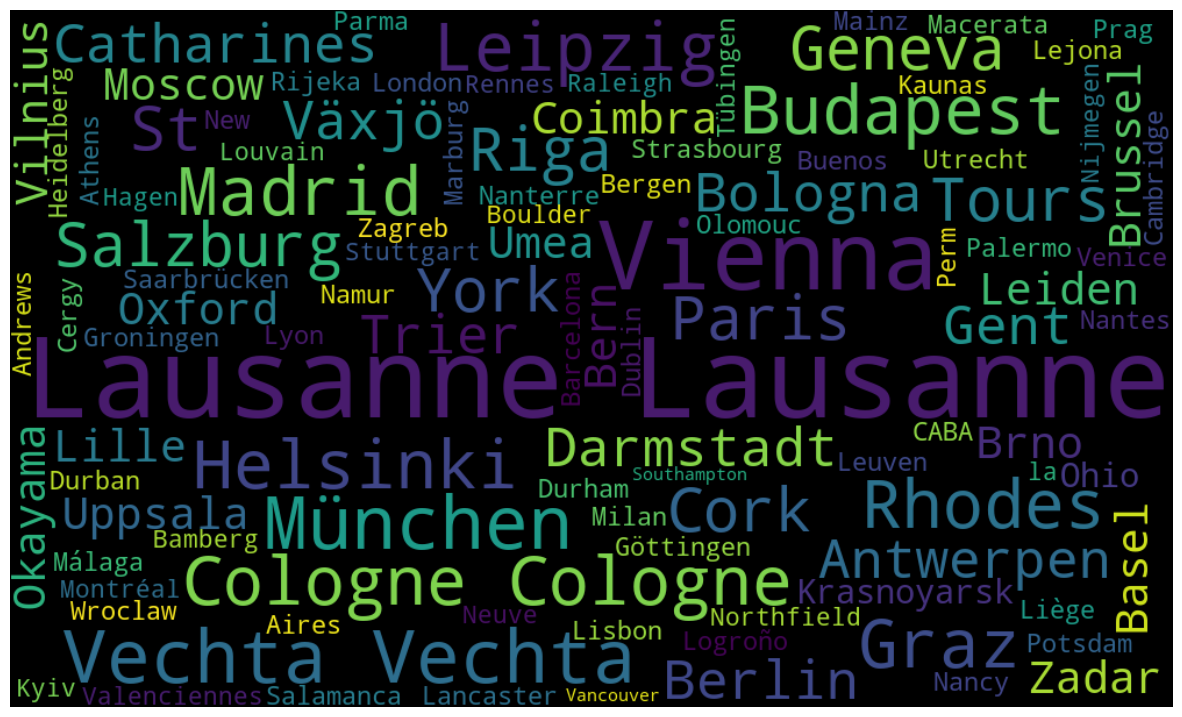

In [10]:
df = pd.read_csv('DH courses.csv')

courses = ' '.join(df['city/name'])
wordcloud = WordCloud(height = 600, width = 1000, max_font_size = 100, background_color='black').generate(courses)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(courses), interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
df['name'].value_counts().reset_index()


,name,count
0,Digital Humanities,11
1,Introduction to Digital Humanities,3
2,MA in Digital Humanities,3
3,Master in Digital Humanities,3
4,Introduction aux humanités numériques,2
...,...,...
202,MSc Digital Heritage,1
203,MSc Digital Archaeology,1
204,Máster Universitario en Humanidades Digitales,1
205,"INPACT - Engineering and Digital for Heritage,...",1


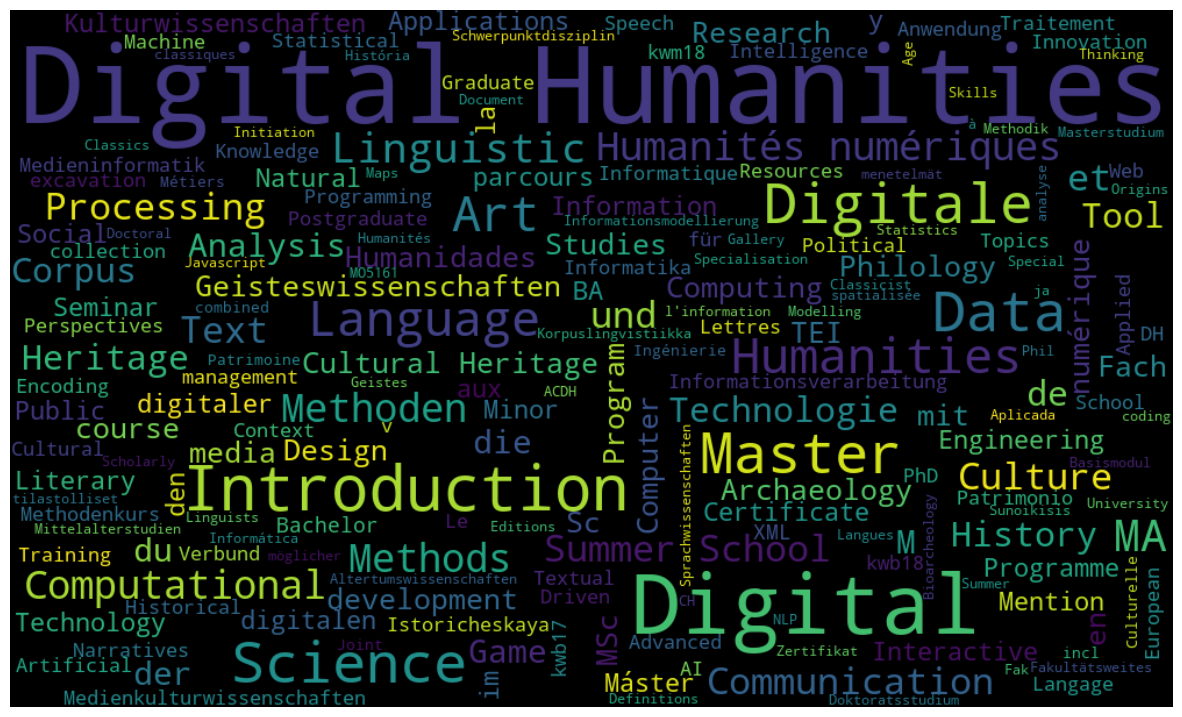

In [12]:
df = pd.read_csv('DH courses.csv')

courses = ' '.join(df['name'])
wordcloud = WordCloud(height = 600, width = 1000, max_font_size = 100, background_color='black').generate(courses)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(courses), interpolation='bilinear')
plt.axis('off')
plt.show()

# FUNCTION TO CLEAN UP

In [13]:
def convert_lower(description):
    return description.lower()
df["Description"] = df["description"].apply(convert_lower)
df["Description"]

0      https://www.uu.nl/masters/en/game-and-media-te...
1      the component digital philology offers a combi...
2      the course of studies “master of arts linguist...
3      ce master pluridisciplinaire forme de futurs p...
4      this module offers an introduction to digital ...
                             ...                        
222    on this master's programme, you will combine c...
223    this program focuses on the intersection of in...
224    the new game program prepares students to lead...
225    the ma in game studies is an interdisciplinary...
226    using digital technologies to explore question...
Name: Description, Length: 227, dtype: object

In [14]:
def clean_html(Description):
    return Description.lower()
df["Description"] = df["Description"].apply(convert_lower)
df["Description"]

0      https://www.uu.nl/masters/en/game-and-media-te...
1      the component digital philology offers a combi...
2      the course of studies “master of arts linguist...
3      ce master pluridisciplinaire forme de futurs p...
4      this module offers an introduction to digital ...
                             ...                        
222    on this master's programme, you will combine c...
223    this program focuses on the intersection of in...
224    the new game program prepares students to lead...
225    the ma in game studies is an interdisciplinary...
226    using digital technologies to explore question...
Name: Description, Length: 227, dtype: object

In [15]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Pre-processing Part

In [16]:
def preprocess_text(Description):
    text = re.sub(r'[^\w\s]', '', Description) # Remove punctuation 
    words = text.split() 
    filtered_words = [w for w in words if not w in stop_words] 
    lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_words] 
    return ' '.join(lemmatized_words)

df['Processed_Description'] = df['Description'].apply(preprocess_text) # Display the processed descriptions 
print(df[['Description', 'Processed_Description']].head())

                                         Description  \
0  https://www.uu.nl/masters/en/game-and-media-te...   
1  the component digital philology offers a combi...   
2  the course of studies “master of arts linguist...   
3  ce master pluridisciplinaire forme de futurs p...   
4  this module offers an introduction to digital ...   

                               Processed_Description  
0  httpswwwuunlmastersengameandmediatechnology cu...  
1  component digital philology offer combination ...  
2  course study master art linguistic literary co...  
3  ce master pluridisciplinaire forme de futurs p...  
4  module offer introduction digital method human...  


In [17]:
df["Processed_Description"]

0      httpswwwuunlmastersengameandmediatechnology cu...
1      component digital philology offer combination ...
2      course study master art linguistic literary co...
3      ce master pluridisciplinaire forme de futurs p...
4      module offer introduction digital method human...
                             ...                        
222    master programme combine core skill data scien...
223    program focus intersection interactive technol...
224    new game program prepares student lead collabo...
225    game study interdisciplinary interfaculty prog...
226    using digital technology explore question cent...
Name: Processed_Description, Length: 227, dtype: object

# Applying Keyword Extractor Function

In [18]:
def course_description(Description):
  """
  Extracts key terms and phrases from a course description.

  Args:
    course_description: The text of the course description.

  Returns:
    A list of key terms and phrases.
  """

def extract_keywords(row):
    keywords = []

    # Assuming the text is already processed
    processed_text = row['Processed_Description']
    words = processed_text.split()

    for word in words:
        keywords.append(word)

    
    return list(set(keywords))

df['Keywords'] = df.apply(extract_keywords, axis=1)

print(df['Keywords'])


0      [question, like, game, application, technology...
1      [linguistics, theory, literary, digitally, stu...
2      [course, societal, linguistics, theory, litera...
3      [écrit, permet, numérique, prépare, enseigneme...
4      [introduction, heritage, edition, preservation...
                             ...                        
222    [human, relationship, science, evolving, techn...
223    [program, equipping, intersection, technology,...
224    [planning, game, dynamic, experience, design, ...
225    [game, key, within, form, interfaculty, study,...
226    [question, explore, art, central, technology, ...
Name: Keywords, Length: 227, dtype: object


# Top 20 Keyword Frequency Visualization

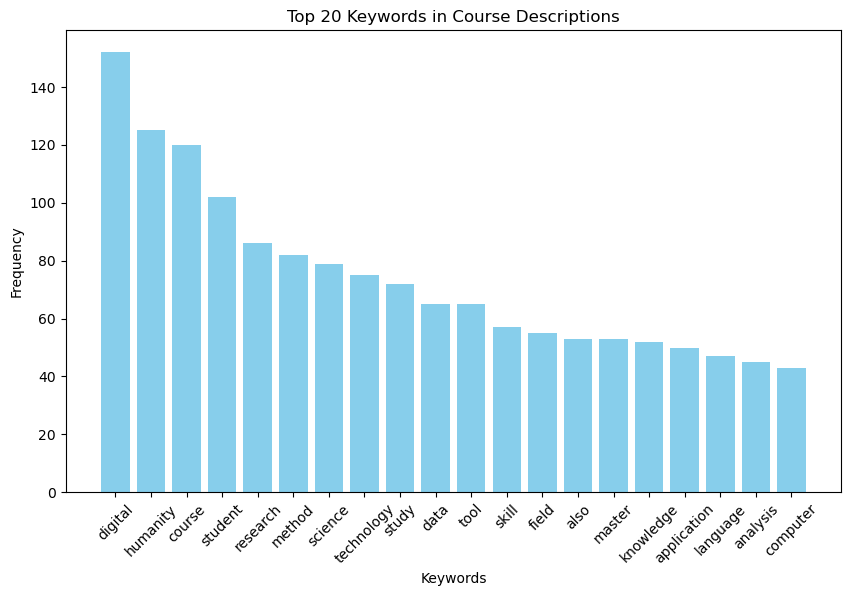

In [19]:
all_keywords = df['Keywords'].explode().tolist() 
keyword_counts = Counter(all_keywords) # Create a bar chart 
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count']) 
keyword_df = keyword_df.sort_values(by='Count', ascending=False).head(20) # Top 20 keywords 

plt.figure(figsize=(10, 6))
plt.bar(keyword_df['Keyword'], 
keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency') 
plt.title('Top 20 Keywords in Course Descriptions')
plt.xticks(rotation=45) 
plt.show()

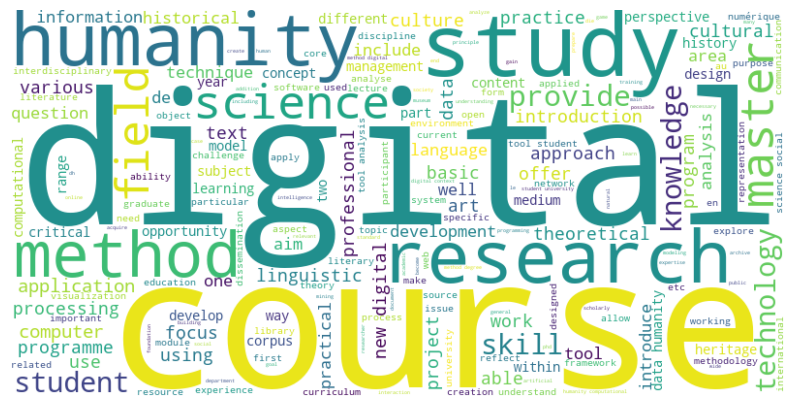

In [20]:
from wordcloud import WordCloud

# Create a single string of all keywords
keywords_string = ' '.join(all_keywords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_string)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Extracting Critical AI Keywords

In [21]:
critical_ai_keywords = [
      "critical",  "ai", "ethical ai", "critical ai", "algorithmic bias", "bias in ai", 
      "surveillance capitalism", "data privacy", "explainable ai", 
      "human-centered ai", "social impact of ai", "fairness", 
      "accountability", "transparency", "justice", "equity" 
  ]

  # List of common AI keywords
ai_keywords = ["artificial intelligence", "machine learning", "deep learning", 
                 "natural language processing", "computer vision", "ai ethics"]


def extract_and_count_keywords(description, ai_keywords, critical_ai_keywords):
    keyword_counts = Counter()
    for keyword in ai_keywords + critical_ai_keywords:
        if keyword in description:
            keyword_counts[keyword] += 1
    return keyword_counts


# Apply the function to each row
df['Keyword_counts'] = df['Processed_Description'].apply(
    lambda x: extract_and_count_keywords(x, ai_keywords, critical_ai_keywords)
)

print(df[['Processed_Description', 'Keyword_counts']])


                                 Processed_Description  \
0    httpswwwuunlmastersengameandmediatechnology cu...   
1    component digital philology offer combination ...   
2    course study master art linguistic literary co...   
3    ce master pluridisciplinaire forme de futurs p...   
4    module offer introduction digital method human...   
..                                                 ...   
222  master programme combine core skill data scien...   
223  program focus intersection interactive technol...   
224  new game program prepares student lead collabo...   
225  game study interdisciplinary interfaculty prog...   
226  using digital technology explore question cent...   

                    Keyword_counts  
0                        {'ai': 1}  
1                               {}  
2                        {'ai': 1}  
3                        {'ai': 1}  
4                               {}  
..                             ...  
222  {'critical': 1, 'justice': 1}  
223    

# Frequency of AI and Critical AI Keywords Bar Chart

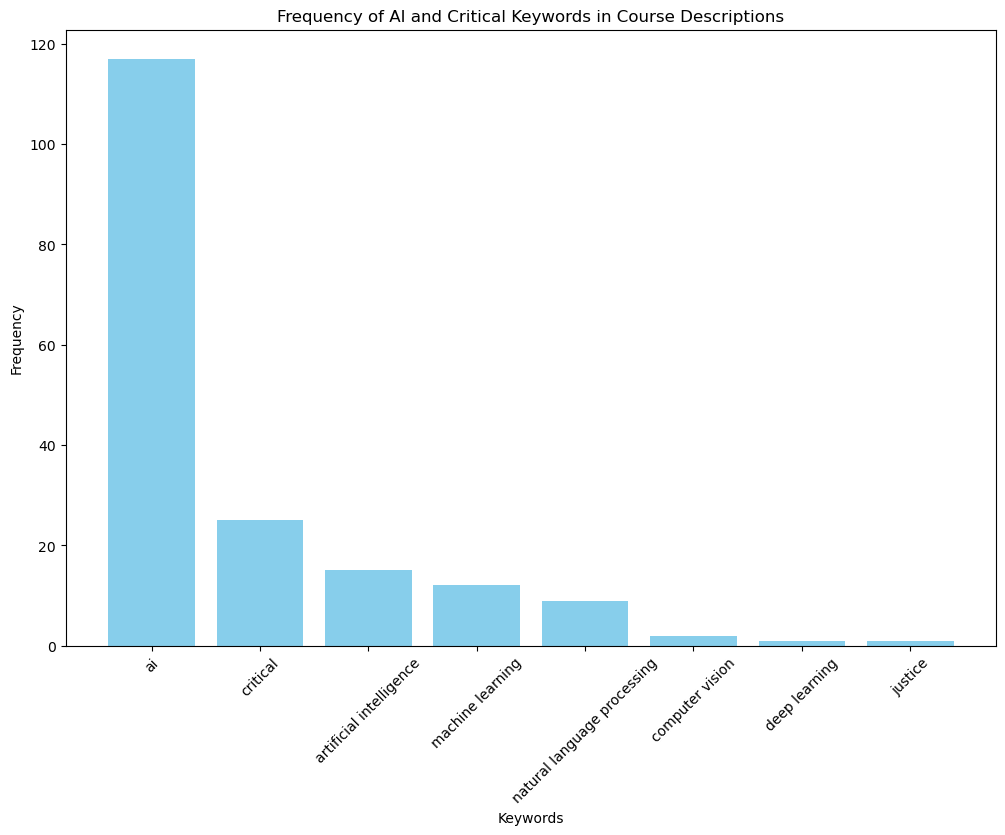

In [22]:
# Sum all the keyword counts from the dataframe
all_keyword_counts = sum(df['Keyword_counts'], Counter())

# Convert Counter to DataFrame for plotting
keyword_df = pd.DataFrame(all_keyword_counts.items(), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of AI and Critical Keywords in Course Descriptions')
plt.xticks(rotation=45)
plt.show()

# Drawing Word Cloud of Keywords

In [23]:
ai_courses = df[df['description'].str.contains('|'.join(ai_keywords), case=False, na=False)]
                                                         
def extract_ai_keywords(description, ai_keywords):
    return [keyword for keyword in ai_keywords if keyword in description.lower()]

# Creating the new DataFrame
course_data = {
    'name': ai_courses['name'],
    'description': ai_courses['description'],
    'keywords': ai_courses['description'].apply(lambda x: extract_ai_keywords(x, ai_keywords))
}

new_df = pd.DataFrame(course_data)

# Display the new DataFrame
print(new_df)

# Optionally, save the new DataFrame to a CSV file
new_df.to_csv('ai_courses_with_keywords.csv', index=False)

# Print a message to indicate the CSV file has been saved
print("Courses mentioning AI-related keywords with their keywords have been successfu")

                                                  name  \
6                          Natural Language Processing   
22               Topics in Natural Language Processing   
25   Digitale Methodik in den Geistes- und Kulturwi...   
38   Humanities in the Digital Age: Introduction to...   
41                     Informática Aplicada à História   
54              Introduction to Computational Thinking   
58   M.Sc. Program in Natural Language Processing (...   
61                   Master "Technologies des Langues"   
65                            MA in Digital Humanities   
85                 Sprache, Technologie, Medien (STeM)   
87                               Digital Text Analysis   
96          Master in Language Analysis and Processing   
105                                 Digital Humanities   
112    Introduction to Computational Linguistics (DHS)   
136  Digital Humanities and Artificial Intelligence...   
141                                 Digital Humanities   
145           

In [24]:
import pandas as pd

df1 = pd.read_csv('ai_courses_with_keywords.csv')

df2 = pd.DataFrame(df1, columns=['name', 'description', 'keywords'])


df2['keywords'] = df2['keywords'].apply(eval)

# Display the DataFrame

print(df2)

                                                 name  \
0                         Natural Language Processing   
1               Topics in Natural Language Processing   
2   Digitale Methodik in den Geistes- und Kulturwi...   
3   Humanities in the Digital Age: Introduction to...   
4                     Informática Aplicada à História   
5              Introduction to Computational Thinking   
6   M.Sc. Program in Natural Language Processing (...   
7                   Master "Technologies des Langues"   
8                            MA in Digital Humanities   
9                 Sprache, Technologie, Medien (STeM)   
10                              Digital Text Analysis   
11         Master in Language Analysis and Processing   
12                                 Digital Humanities   
13    Introduction to Computational Linguistics (DHS)   
14  Digital Humanities and Artificial Intelligence...   
15                                 Digital Humanities   
16                             

In [25]:
import nltk
from nltk.tokenize import sent_tokenize
from collections import defaultdict

# Ensure you have the necessary nltk data
nltk.download('punkt')

# Assuming df['Processed Description'] contains the course descriptions
text_data = df['Processed_Description'].tolist()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91970\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Create a dictionary to hold the context sentences for each keyword
keyword_context = defaultdict(list)

# Iterate over the text data to find sentences containing the keywords
for text in text_data:
    sentences = sent_tokenize(text)
    for keyword in keyword_df['Keyword']:
        for sentence in sentences:
            if keyword in sentence:
                keyword_context[keyword].append(sentence)

# Convert keyword_context to a DataFrame for better visualization
context_df = pd.DataFrame([(k, v) for k, vals in keyword_context.items() for v in vals], columns=['Keyword', 'Context'])

# Display the DataFrame
context_df.head()

# You can save the context_df to a CSV file for further analysis if needed
context_df.to_csv('keyword_context.csv', index=False)

In [27]:
import pandas as pd

# Read the CSV file into a DataFrame
context_df = pd.read_csv('keyword_context.csv')

# Display the first few rows of the DataFrame
print(context_df.head())

# Perform any further analysis or processing on the DataFrame
# For example, you can filter the context for a specific keyword
keyword = 'AI'
filtered_context = context_df[context_df['Keyword'] == keyword]

# Display the filtered context
print(filtered_context)


  Keyword                                            Context
0      ai  httpswwwuunlmastersengameandmediatechnology cu...
1      ai  course study master art linguistic literary co...
2      ai  ce master pluridisciplinaire forme de futurs p...
3      ai  nlp cldh department offer modern master degree...
4      ai  master programme offer possibility conduct ind...
Empty DataFrame
Columns: [Keyword, Context]
Index: []


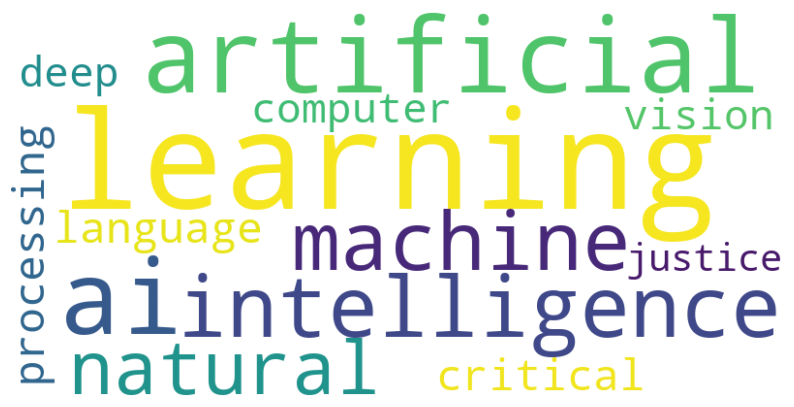

In [28]:
from wordcloud import WordCloud

# Create a single string of all keywords
keywords_string = ' '.join(all_keyword_counts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_string)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Uploading required Transformers model

In [29]:
!pip install bertopic sentence-transformers umap-learn hdbscan

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [31]:
!pip install numpy==1.24.0

In [32]:
!pip install pandas transformers torch

# Sentiment Analysis

In [33]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Define a helper function to split the text into chunks
def chunk_text(text, chunk_size=512):
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

# Analyze sentiment for each chunk and aggregate the results
def analyze_sentiment(text, chunk_size=512):
    chunks = chunk_text(text, chunk_size)
    sentiments = [sentiment_pipeline(chunk)[0]['label'] for chunk in chunks]
    # Aggregate the sentiment results (e.g., most frequent sentiment)
    return max(set(sentiments), key=sentiments.count)

df['Sentiment'] = df['Processed_Description'].apply(analyze_sentiment)

# Display the sentiment results
print(df[['Description', 'Sentiment']])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                           Description Sentiment
0    https://www.uu.nl/masters/en/game-and-media-te...  POSITIVE
1    the component digital philology offers a combi...  POSITIVE
2    the course of studies “master of arts linguist...  POSITIVE
3    ce master pluridisciplinaire forme de futurs p...  NEGATIVE
4    this module offers an introduction to digital ...  POSITIVE
..                                                 ...       ...
222  on this master's programme, you will combine c...  POSITIVE
223  this program focuses on the intersection of in...  POSITIVE
224  the new game program prepares students to lead...  POSITIVE
225  the ma in game studies is an interdisciplinary...  POSITIVE
226  using digital technologies to explore question...  POSITIVE

[227 rows x 2 columns]


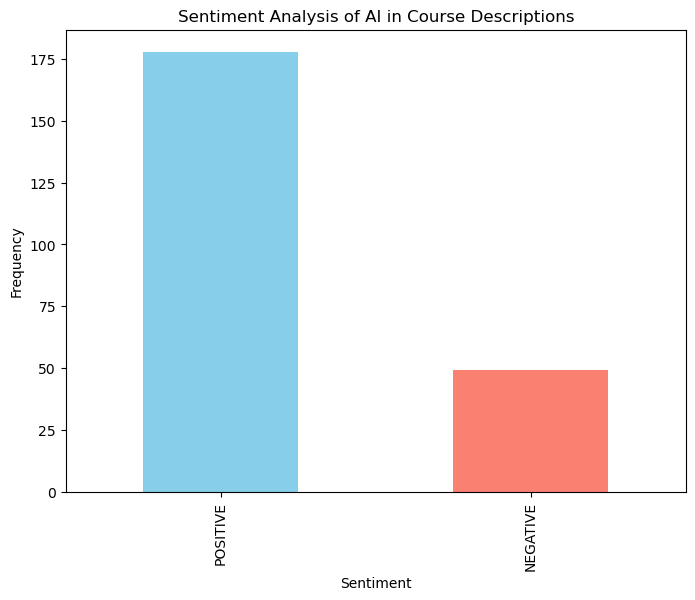

In [34]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of AI in Course Descriptions')
plt.show()

In [35]:
# Count the number of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Convert counts to percentages
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100
print(sentiment_percentages)


Sentiment
POSITIVE    78.414097
NEGATIVE    21.585903
Name: count, dtype: float64


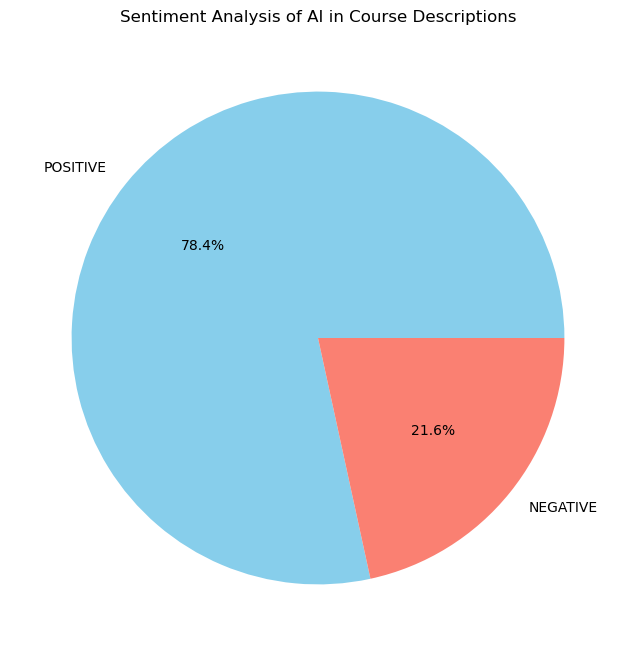

In [36]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Sentiment Analysis of AI in Course Descriptions')
plt.show()


# Sentiment Analysis Model Initialization

In [37]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Identifying aspect_based_sentiment

In [38]:
aspects = ["bias", "privacy", "job displacement", "ethics", "opportunity", "critical"]

def aspect_based_sentiment(text, aspect):
    """
    Performs aspect-based sentiment analysis on the given text.

    Args:
        text: The text to analyze.
        aspect: The specific aspect to analyze sentiment for.

    Returns:
        A tuple containing the sentiment score and the aspect.
    """
    # Check if the aspect is mentioned in the text
    if aspect.lower() in text.lower():
        # Extract the relevant portion of the text
        start = text.lower().find(aspect.lower())
        end = start + len(aspect)
        # Fix the attribute error by using text.find and text.rfind
        aspect_context = text[max(text.rfind('.', 0, start) + 1, 0):text.find('.', end)]

        # Perform sentiment analysis on the context
        inputs = tokenizer(aspect_context, return_tensors="pt", truncation=True, padding=True)
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = logits.argmax(-1).item()
        sentiment = "positive" if predicted_class == 1 else "negative"  # Assuming label 1 is positive

        return sentiment, aspect
    else:
        return None, None
    
sentiment_results = []

# Loop through each course description and each aspect
for _, row in df.iterrows():
    for aspect in aspects:
        sentiment, aspect_found = aspect_based_sentiment(row['Processed_Description'], aspect)
        if sentiment is not None:
            sentiment_results.append({'course_title': row['name'], 'aspect': aspect, 'sentiment': sentiment})

# Convert the results to a DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

# Display the sentiment analysis results
print(sentiment_df)

                                         course_title       aspect sentiment
0   Masterstudium "Digitale Geisteswissenschaften"...  opportunity  positive
1                                ACDH-CH Tool Gallery  opportunity  positive
2                            MA in Digital Humanities  opportunity  positive
3                            MA in Digital Humanities     critical  positive
4                     Informática Aplicada à História     critical  positive
5              Introduction to Computational Thinking     critical  positive
6       MA in Digital Art History/Computational Media     critical  positive
7            Master's Programme in Digital Humanities  opportunity  positive
8                                MSc Digital Heritage  opportunity  positive
9                             History and the digital  opportunity  positive
10                            History and the digital     critical  positive
11                Sprache, Technologie, Medien (STeM)  opportunity  positive

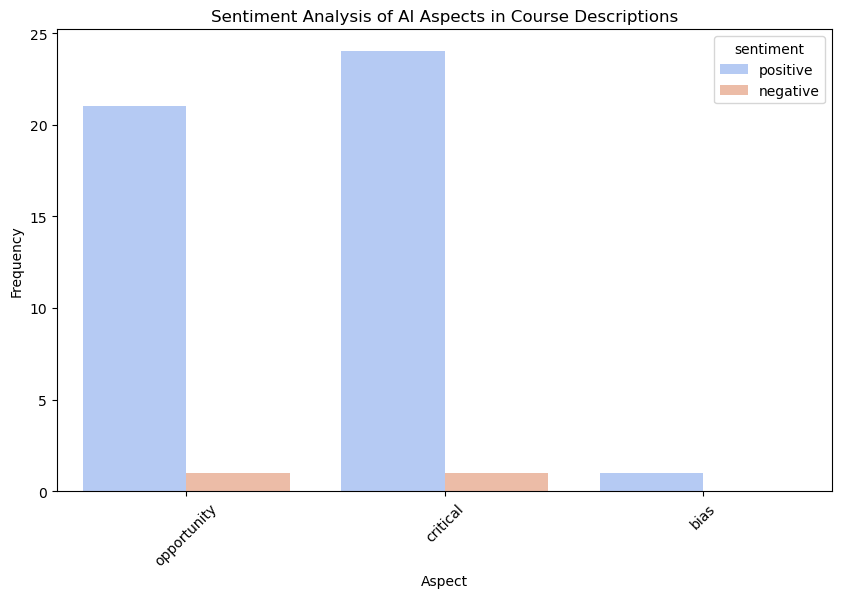

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the sentiment distribution for each aspect
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment_df, x='aspect', hue='sentiment', palette='coolwarm')
plt.title('Sentiment Analysis of AI Aspects in Course Descriptions')
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

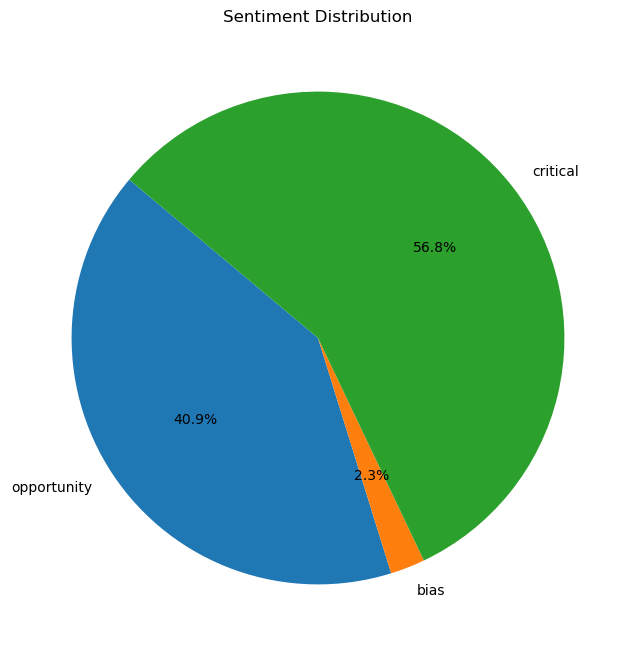

In [40]:
import matplotlib.pyplot as plt

# Sample data from the bar graph (replace with your actual values)
data = {'Sentiment': ['opportunity', 'bias', 'critical'], 'Frequency': [18, 1, 25]}

# Calculate percentages (using sum() on the list of frequencies)
total_frequency = sum(data['Frequency'])
data['Percentage'] = [(freq / total_frequency) * 100 for freq in data['Frequency']] 

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data['Percentage'], labels=data['Sentiment'], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

# Course Description Processing 

In [41]:
course_texts = []

for _, row in df.iterrows():
    text = f"""
    Course: {row['name']}
    Description: {row['description']}
    Department: {row['department']}
    Qualification: {row['access_requirements']}
    Institution: {row['institution/name']}
    Country: {row['country/name']}
    City: {row['city/name']}
    Course Duration: {row['duration']}
    Course Type: {row['course_parent_type/name']}
    """
    course_texts.append(text)

# Embedding Generation Model Selection

In [42]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')  # Choose an appropriate model
course_embeddings = model.encode(course_texts)


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

def get_answer(question, course_texts, course_embeddings, model):
    question_embedding = model.encode([question])
    similarities = cosine_similarity(question_embedding, course_embeddings)
    most_similar_idx = similarities.argmax()
    return course_texts[most_similar_idx]

# Q&A model testing

In [44]:
question = "What is the best course available in Digital Humanities?"
answer = get_answer(question, course_texts, course_embeddings, model)
print(answer)


    Course: Graduate Certificate in Digital Humanities
    Description: The Certificate in Digital Humanities allows degree-seeking or non-degree-seeking graduate students from any discipline to construct a curriculum in digital humanities training and project work. The certificate is currently coordinated in the English department with participation across colleges.

The Graduate Certificate consists of a student-proposed curriculum of four 3-credit courses which must collectively satisfy the program’s three requirements: contexts, training, and applications. In consultation with the coordinator, students can propose their own tracks through the certificate drawing from a broad array of approved courses at NC State as well as at UNC and Duke, as part of the Triangle Digital Humanities Network. Rather than insisting on a prescriptive definition and preset curriculum for “digital humanities,” this certificate program encourages students to adapt course offerings in digital humanities o